In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_excel(r"C:\Users\zeear\Documents\GitHub\machine_learning\anz_virtual_internship/data/ANZ synthesised transaction dataset.xlsx")
print(data.shape)
data.head()

(12043, 23)


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

### column info
* card_present_flag - customer has card when he purchased
* long_lat - longtitude, latitude
* txn = transaction - 'POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY','PHONE BANK'

In [5]:
data['movement'].unique()

array(['debit', 'credit'], dtype=object)

In [6]:
data['status'].unique()

array(['authorized', 'posted'], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [8]:
data['status_cat'] = data['status'].astype('category').cat.codes
data['txn_cat'] = data['txn_description'].astype('category').cat.codes
data['gender_cat'] = data['gender'].astype('category').cat.codes
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,status_cat,txn_cat,gender_cat
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,0,4,0
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,0,5,0
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,0,4,1
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,0,5,0
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,0,5,0


In [9]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount,status_cat,txn_cat,gender_cat
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588,0.359213,3.420078,0.521880
std,0.398029,0.0,31503.722652,10.046343,592.599934,0.479790,1.583732,0.499542
min,0.000000,0.0,0.240000,18.000000,0.100000,0.000000,0.000000,0.000000
25%,1.000000,0.0,3158.585000,22.000000,16.000000,0.000000,2.000000,0.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000,0.000000,4.000000,1.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000,1.000000,5.000000,1.000000
max,1.000000,0.0,267128.520000,78.000000,8835.980000,1.000000,5.000000,1.000000


* average of amount = 187.934

In [10]:
data.loc[data['card_present_flag'].isnull()]['txn_description'].unique()

array(['PAYMENT', 'INTER BANK', 'PAY/SALARY', 'PHONE BANK'], dtype=object)

In [11]:
data.loc[data['card_present_flag']==0]['txn_description'].unique()

array(['SALES-POS', 'POS'], dtype=object)

In [12]:
data.loc[data['card_present_flag']==1]['txn_description'].unique()

array(['POS', 'SALES-POS'], dtype=object)

In [13]:
data.loc[data['card_present_flag'].isnull()]['status'].unique()

array(['posted'], dtype=object)

##### card_present_flag
* status: authorized only
* txn_description: sales-pos, pos
##### card_preset_flag null
* status : posted only
* txn_Description : payment, inter bank, pay/salary, phone bank

### analysis by day of week

In [14]:
data['dayofweek'] = pd.to_datetime(data['date'])
data['dayofweek']= data['dayofweek'].apply(lambda x: x.dayofweek)

In [15]:
function = ['count', 'sum', 'mean']
df = data.groupby('dayofweek').agg(function)['amount'].reset_index()
df.columns =['dayofweek', 'count', 'total_amount', 'mean_amount']
df

,dayofweek,count,total_amount,mean_amount
0,0,1360,507580.56,373.221000
1,1,1487,329484.19,221.576456
2,2,2063,402729.72,195.215570
3,3,1801,331402.77,184.010422
4,4,2073,516909.84,249.353517
5,5,1709,93002.56,54.419286
6,6,1550,82174.56,53.015845


<AxesSubplot:xlabel='dayofweek', ylabel='mean_amount'>

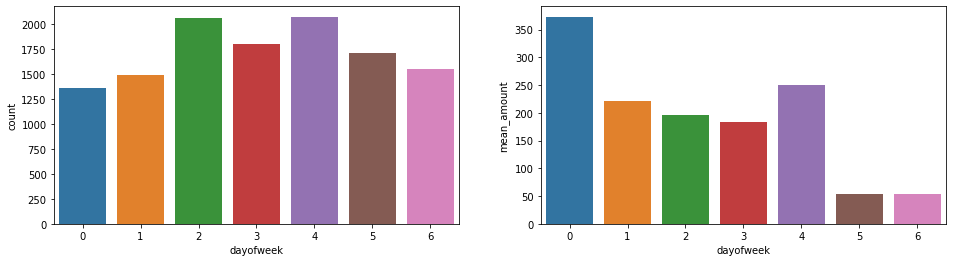

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,4)
sns.barplot(data=df, x="dayofweek", y='count',ax= ax1)
sns.barplot(data=df, x="dayofweek", y='mean_amount',ax= ax2)

### analysis by month

In [17]:
data['count'] = 1
data['month'] = pd.to_datetime(data['date']).apply(lambda x: x.month)
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,country,customer_id,merchant_long_lat,movement,status_cat,txn_cat,gender_cat,dayofweek,count,month
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Australia,CUS-2487424745,153.38 -27.99,debit,0,4,0,2,1,8
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Australia,CUS-2487424745,151.21 -33.87,debit,0,5,0,2,1,8
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,Australia,CUS-2142601169,151.21 -33.87,debit,0,4,1,2,1,8
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,Australia,CUS-1614226872,153.05 -26.68,debit,0,5,0,2,1,8
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,Australia,CUS-2487424745,153.44 -28.06,debit,0,5,0,2,1,8


In [18]:
function = ['count','sum','mean']
df = data.groupby('month')['amount'].describe().reset_index()
# df.columns = ['month', 'count', 'mean_amount', 'to']

<AxesSubplot:xlabel='month', ylabel='mean'>

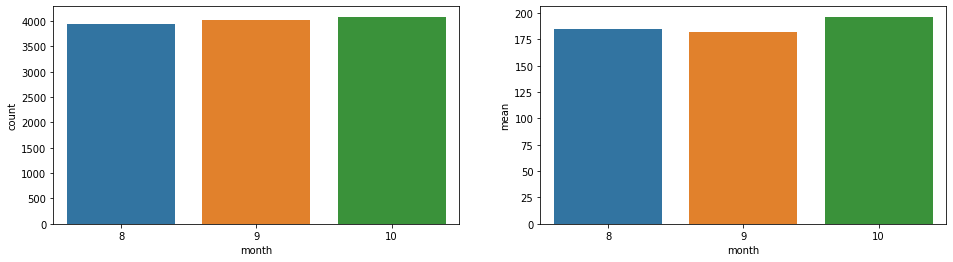

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,4)
sns.barplot(data=df, x='month', y='count', ax=ax1)
sns.barplot(data=df, x='month', y='mean', ax= ax2, )

### analysis by time

In [20]:
data['hour'] = pd.to_datetime(data['extraction']).apply(lambda x: x.hour)
interested = ['extraction', 'hour']
data[interested]

,extraction,hour
0,2018-08-01T01:01:15.000+0000,1
1,2018-08-01T01:13:45.000+0000,1
2,2018-08-01T01:26:15.000+0000,1
3,2018-08-01T01:38:45.000+0000,1
4,2018-08-01T01:51:15.000+0000,1
...,...,...
12038,2018-10-31T23:09:06.000+0000,23
12039,2018-10-31T23:21:46.000+0000,23
12040,2018-10-31T23:34:25.000+0000,23
12041,2018-10-31T23:47:05.000+0000,23


In [21]:
data['hour'].unique()

array([ 1,  2,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23,  0,  3,  5], dtype=int64)

In [22]:
data.groupby('hour')['amount'].mean()

hour
0      28.274907
1      48.716402
2      75.269764
3      84.725918
4      61.301845
5      64.524641
6      59.205261
7      72.927256
8      43.749159
9      42.301130
10     52.810130
11    315.735600
12    374.033591
13    665.238692
14    258.750225
15    233.858901
16    337.369244
17    587.677902
18     53.568407
19     54.528923
20     46.814900
21     44.511484
22     52.292445
23     50.653333
Name: amount, dtype: float64

<AxesSubplot:xlabel='hour', ylabel='amount'>

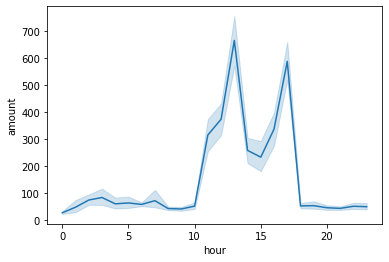

In [23]:
sns.lineplot(data=data, x='hour', y='amount')

### analysis by age, hour

In [24]:
data['age'].unique()

array([26, 38, 40, 20, 43, 27, 19, 23, 30, 46, 47, 24, 37, 25, 21, 39, 31,
       34, 18, 78, 22, 42, 33, 28, 44, 69, 35, 41, 53, 64, 50, 52, 29],
      dtype=int64)

In [25]:
data['age_group']='70s'
data['age_group'][data.age<70] = "60s"
data['age_group'][data.age<60] = "50s"
data['age_group'][data.age<50] = "40s"
data['age_group'][data.age<40] = "30s"
data['age_group'][data.age<30] = "20s"
data['age_group'][data.age<20] = "10s"
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_long_lat,movement,status_cat,txn_cat,gender_cat,dayofweek,count,month,hour,age_group
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,153.38 -27.99,debit,0,4,0,2,1,8,1,20s
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,151.21 -33.87,debit,0,5,0,2,1,8,1,20s
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,151.21 -33.87,debit,0,4,1,2,1,8,1,30s
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,153.05 -26.68,debit,0,5,0,2,1,8,1,40s
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,153.44 -28.06,debit,0,5,0,2,1,8,1,20s


In [26]:
interested = ['age', 'age_group']
data[interested]

,age,age_group
0,26,20s
1,26,20s
2,38,30s
3,40,40s
4,26,20s
...,...,...
12038,30,30s
12039,20,20s
12040,28,20s
12041,69,60s


<AxesSubplot:xlabel='hour', ylabel='amount'>

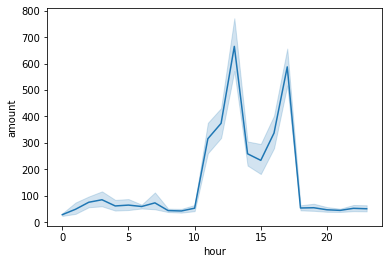

In [148]:
sns.lineplot(data=data, x='hour', y='amount')

In [28]:
data['age_group2'] = "50s~70s"
data['age_group2'][data.age<50] = "20s~40s"
data['age_group2'][data.age<20] = "10s"
interested=['age_group','age_group2']
data[interested].head()

,age_group,age_group2
0,20s,20s~40s
1,20s,20s~40s
2,30s,20s~40s
3,40s,20s~40s
4,20s,20s~40s


<AxesSubplot:xlabel='hour', ylabel='amount'>

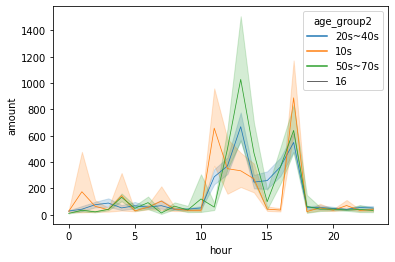

In [29]:
sns.lineplot(data=data, x='hour', y='amount', hue='age_group2', size=16)

In [146]:
interested = ['hour', 'age_group']
function = ['count', 'mean','sum']
df = data.groupby(interested).agg(function)['amount'].reset_index()
df.columns = ['hour', 'age_group', 'count', 'mean of amount', 'sum']
df.head()

,hour,age_group,count,mean of amount,sum
0,0,10s,9,26.352222,237.17
1,0,20s,55,28.524000,1568.82
2,0,30s,34,24.523824,833.81
3,0,40s,8,49.015000,392.12
4,0,50s,2,10.885000,21.77


<AxesSubplot:xlabel='hour', ylabel='mean of amount'>

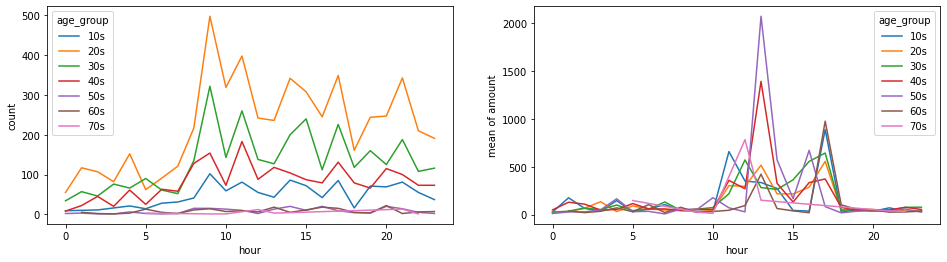

In [31]:
fig,(ax1, ax2)  = plt.subplots(ncols=2)
fig.set_size_inches(16,4)
sns.lineplot(data=df, x='hour', y='count', hue='age_group',ax = ax1)
sns.lineplot(data=df, x='hour', y='mean of amount', hue='age_group',ax = ax2)

<AxesSubplot:xlabel='hour', ylabel='count'>

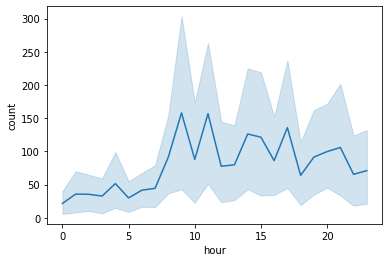

In [150]:
sns.lineplot(data=df, x='hour', y=df['count'])

### analysis by transaction

In [32]:
function = ['count', 'mean','sum']
df = data.groupby("txn_description").agg(function)['amount'].reset_index()
df.columns = ['transaction', 'count', 'mean_amount', 'total_amount']
df

,transaction,count,mean_amount,total_amount
0,INTER BANK,742,86.699461,64331.00
1,PAY/SALARY,883,1898.728029,1676576.85
2,PAYMENT,2600,77.613077,201794.00
3,PHONE BANK,101,106.099010,10716.00
4,POS,3783,40.407412,152861.24
5,SALES-POS,3934,39.909789,157005.11


In [33]:
interested = ['INTER BANK', "PAYMENT", 'PHONE BANK', 'POS', 'SALES-POS']
df2 = df.loc[df['transaction'] != "PAY/SALARY"]
df2

,transaction,count,mean_amount,total_amount
0,INTER BANK,742,86.699461,64331.00
2,PAYMENT,2600,77.613077,201794.00
3,PHONE BANK,101,106.099010,10716.00
4,POS,3783,40.407412,152861.24
5,SALES-POS,3934,39.909789,157005.11


<AxesSubplot:xlabel='transaction', ylabel='mean_amount'>

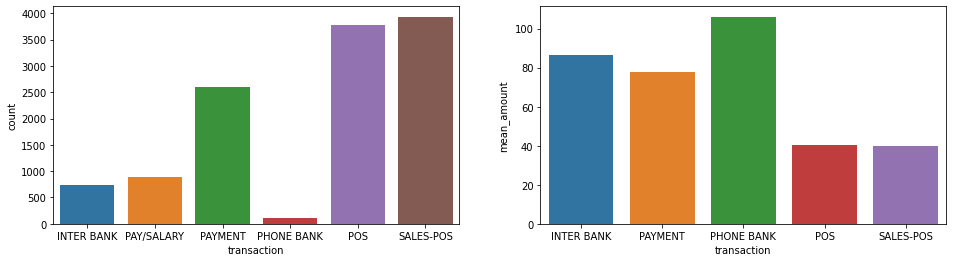

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,4)
sns.barplot(data=df, x='transaction', y='count',ax = ax1)
sns.barplot(data=df2, x='transaction', y='mean_amount',ax = ax2)

##### count
* top higest count : Sales-pos, Pos
* lowest count : Phone Bank

##### mean_amount
* top : Phone Bank
* low : Pos, Sales-pos

### analysis by month, day

In [35]:
data['day'] = data['date'].apply(lambda x: x.day)
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,status_cat,txn_cat,gender_cat,dayofweek,count,month,hour,age_group,age_group2,day
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,0,4,0,2,1,8,1,20s,20s~40s,1
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,0,5,0,2,1,8,1,20s,20s~40s,1
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,0,4,1,2,1,8,1,30s,20s~40s,1
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,0,5,0,2,1,8,1,40s,20s~40s,1
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,0,5,0,2,1,8,1,20s,20s~40s,1


In [36]:
interested = ['month', 'day', 'dayofweek']
function = ['count', 'mean', 'sum']
df = data.groupby(interested).agg(function)['amount'].reset_index()
df.columns = ['month', 'day', 'dayofweek', 'count', 'mean_amount', 'total_amount']
df

,month,day,dayofweek,count,mean_amount,total_amount
0,8,1,2,137,218.014161,29867.94
1,8,2,3,152,143.331053,21786.32
2,8,3,4,157,242.653376,38096.58
3,8,4,5,118,53.356356,6296.05
4,8,5,6,100,44.265000,4426.50
...,...,...,...,...,...,...
86,10,27,5,139,50.155252,6971.58
87,10,28,6,143,59.007762,8438.11
88,10,29,0,102,377.932745,38549.14
89,10,30,1,89,247.891461,22062.34


Text(0.5, 1.0, 'monthly transaction by day')

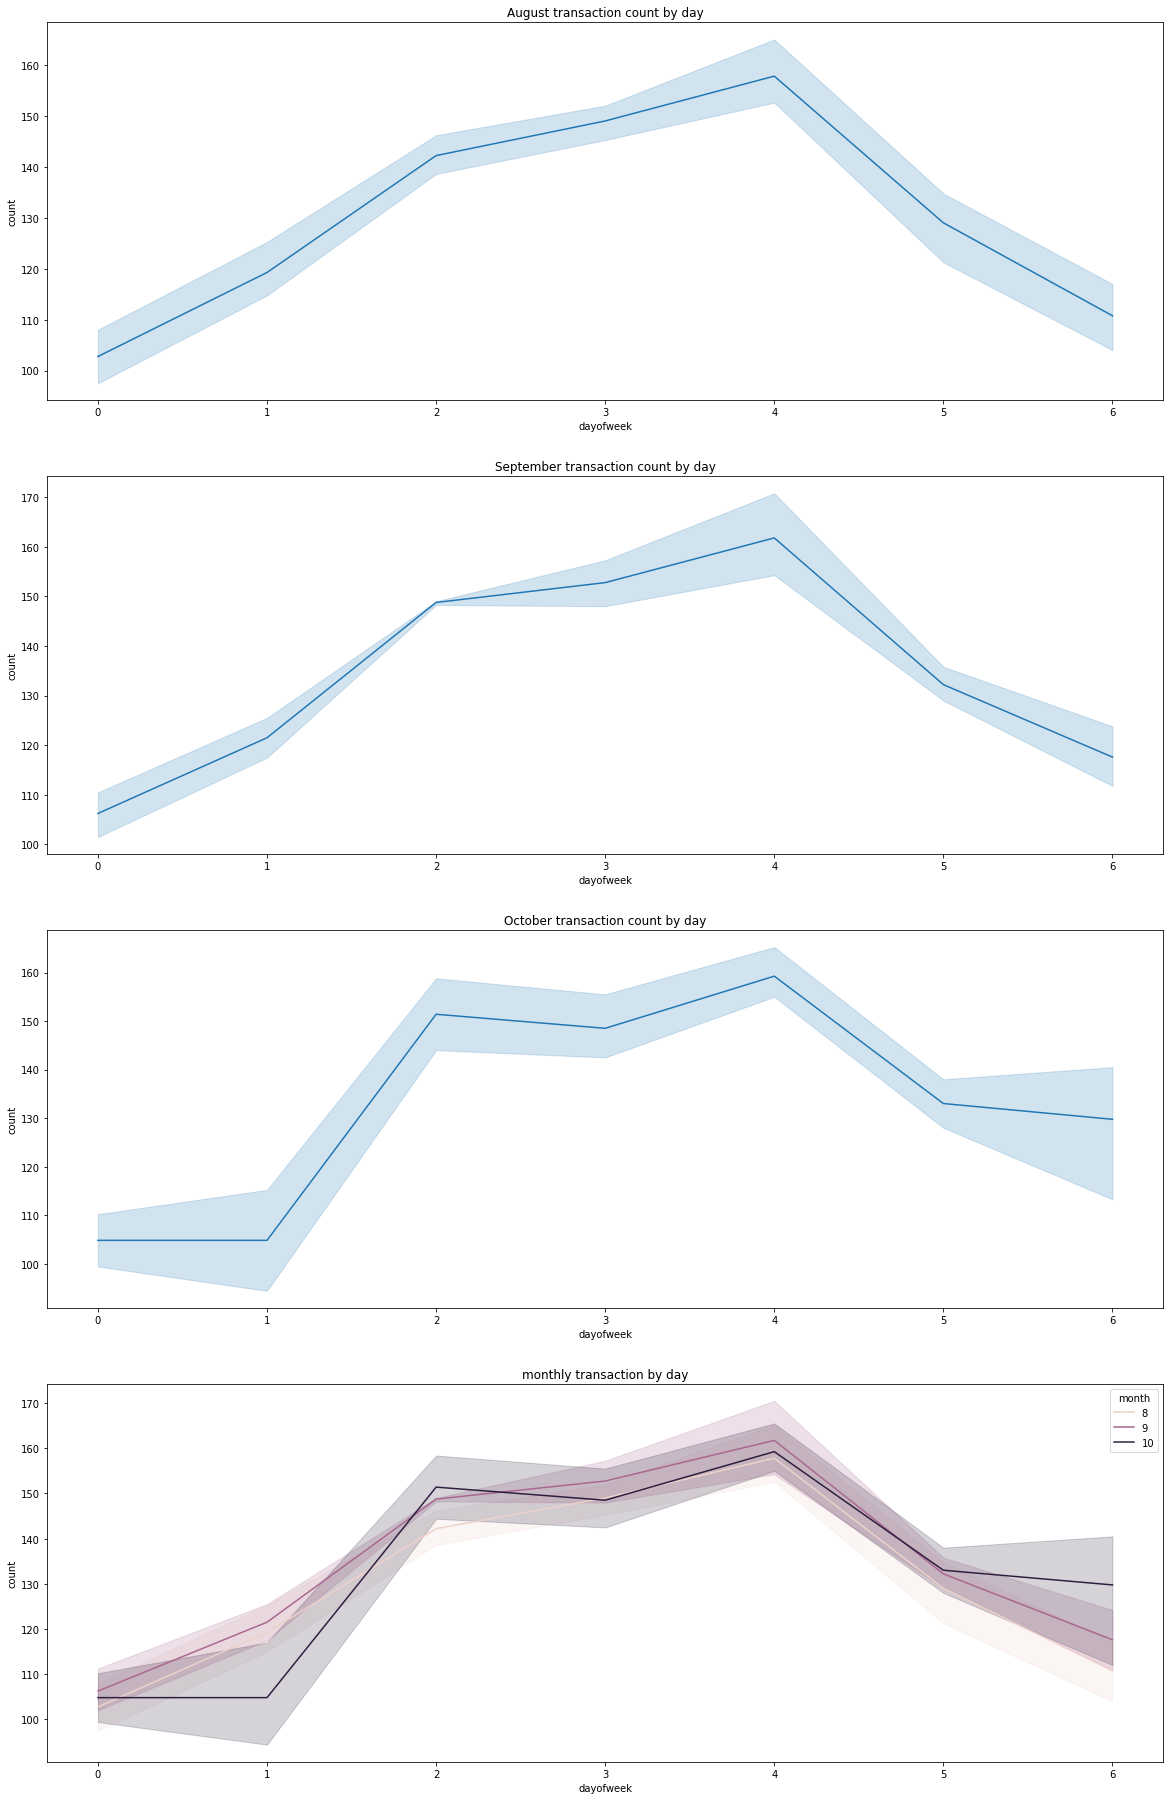

In [37]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4)
fig.set_size_inches(20,32)
sns.lineplot(data=df, x=df.loc[df['month']==8]['dayofweek'], y='count', ax=ax1)
ax1.set_title("August transaction count by day")
sns.lineplot(data=df, x=df.loc[df['month']==9]['dayofweek'], y='count', ax=ax2)
ax2.set_title("September transaction count by day")
sns.lineplot(data=df, x=df.loc[df['month']==10]['dayofweek'], y='count', ax=ax3)
ax3.set_title("October transaction count by day")
sns.lineplot(data=df, x='dayofweek', y='count', ax=ax4, hue='month')
ax4.set_title("monthly transaction by day")

##### Count
* Top2 transaction : Friday, Wednesday

Text(0.5, 1.0, 'Transaction mean amount')

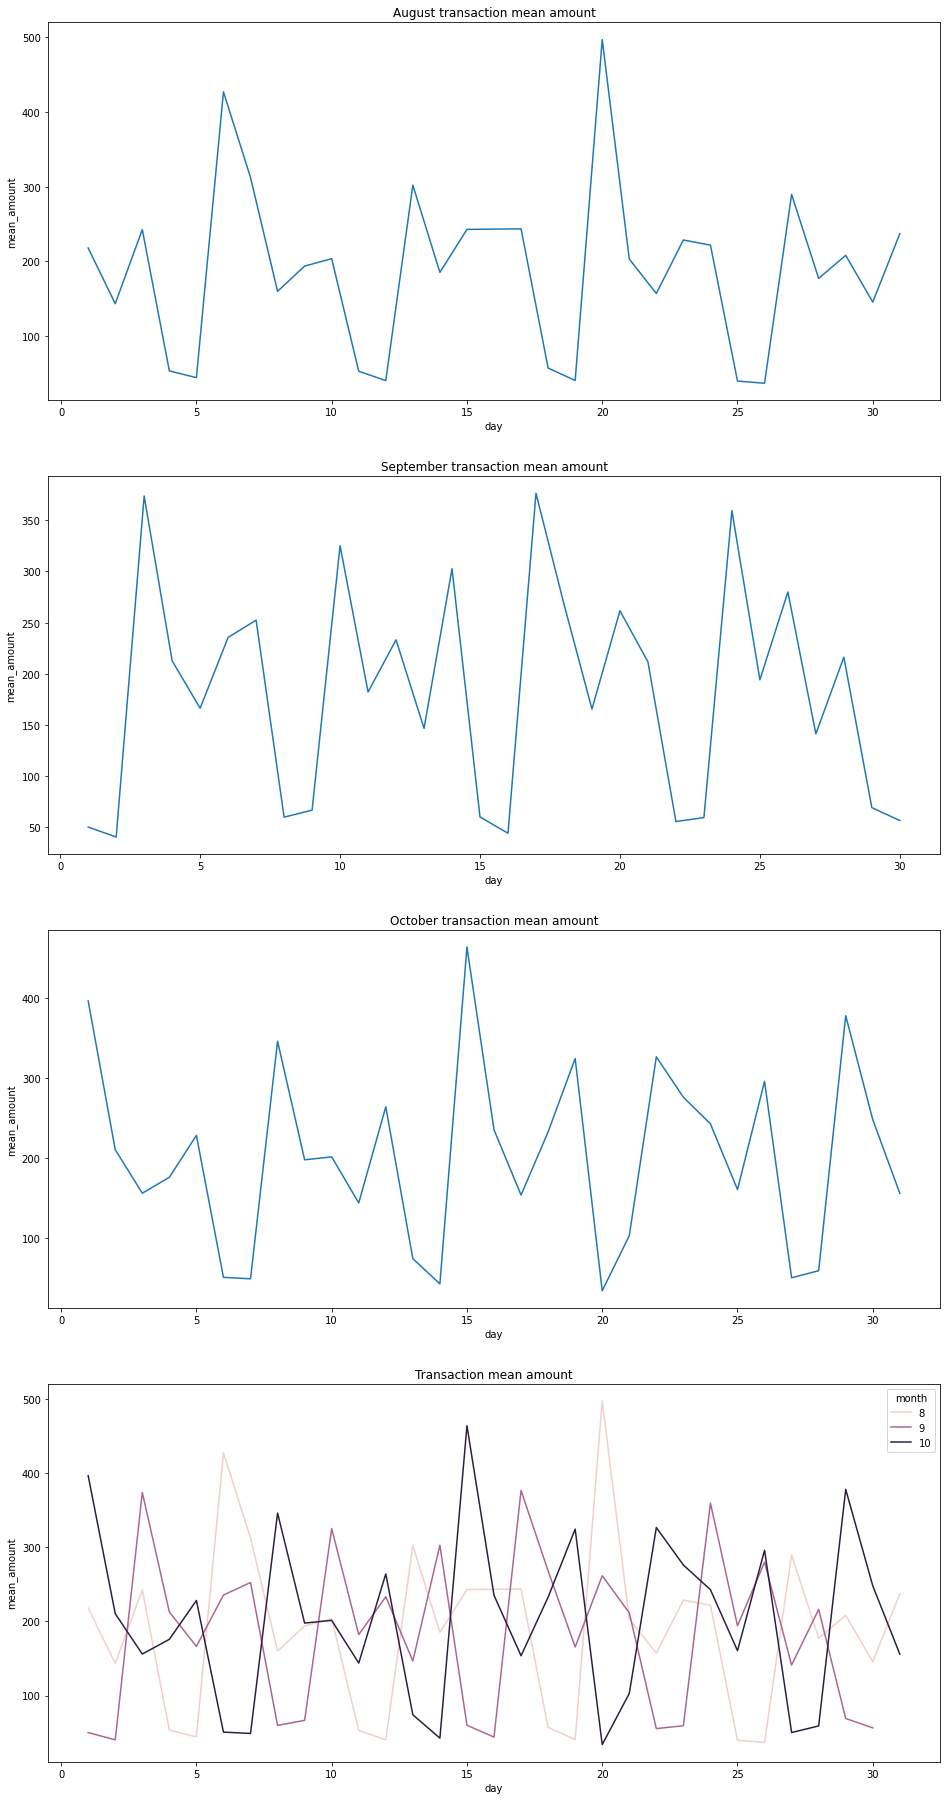

In [38]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4)
fig.set_size_inches(16,32)
sns.lineplot(data=df, x=df.loc[df['month']==8]['day'], y='mean_amount', ax=ax1)
ax1.set_title("August transaction mean amount")
sns.lineplot(data=df, x=df.loc[df['month']==9]['day'], y='mean_amount', ax=ax2)
ax2.set_title("September transaction mean amount")
sns.lineplot(data=df, x=df.loc[df['month']==10]['day'], y='mean_amount', ax=ax3)
ax3.set_title("October transaction mean amount")
sns.lineplot(data=df, x='day', y='mean_amount', ax=ax4, hue='month')
ax4.set_title("Transaction mean amount")

##### Mean_amount
* Graph has seasonality - High on Friday and Wednesday(higest count by day of week)
* repeated weekly

### w/o pay/salary analysis by month, day

In [39]:
interested = ['month', 'day', 'dayofweek']
function = ['count', 'mean', 'sum']
df = data.loc[data['txn_description']!="PAY/SALARY"].groupby(interested).agg(function)['amount'].reset_index()
df.columns = ['month', 'day', 'dayofweek', 'count', 'mean_amount', 'total_amount']
df

,month,day,dayofweek,count,mean_amount,total_amount
0,8,1,2,124,44.729355,5546.44
1,8,2,3,142,53.225986,7558.09
2,8,3,4,142,56.590845,8035.90
3,8,4,5,118,53.356356,6296.05
4,8,5,6,100,44.265000,4426.50
...,...,...,...,...,...,...
86,10,27,5,139,50.155252,6971.58
87,10,28,6,143,59.007762,8438.11
88,10,29,0,86,29.292791,2519.18
89,10,30,1,77,27.134026,2089.32


Text(0.5, 1.0, 'Transaction mean amount')

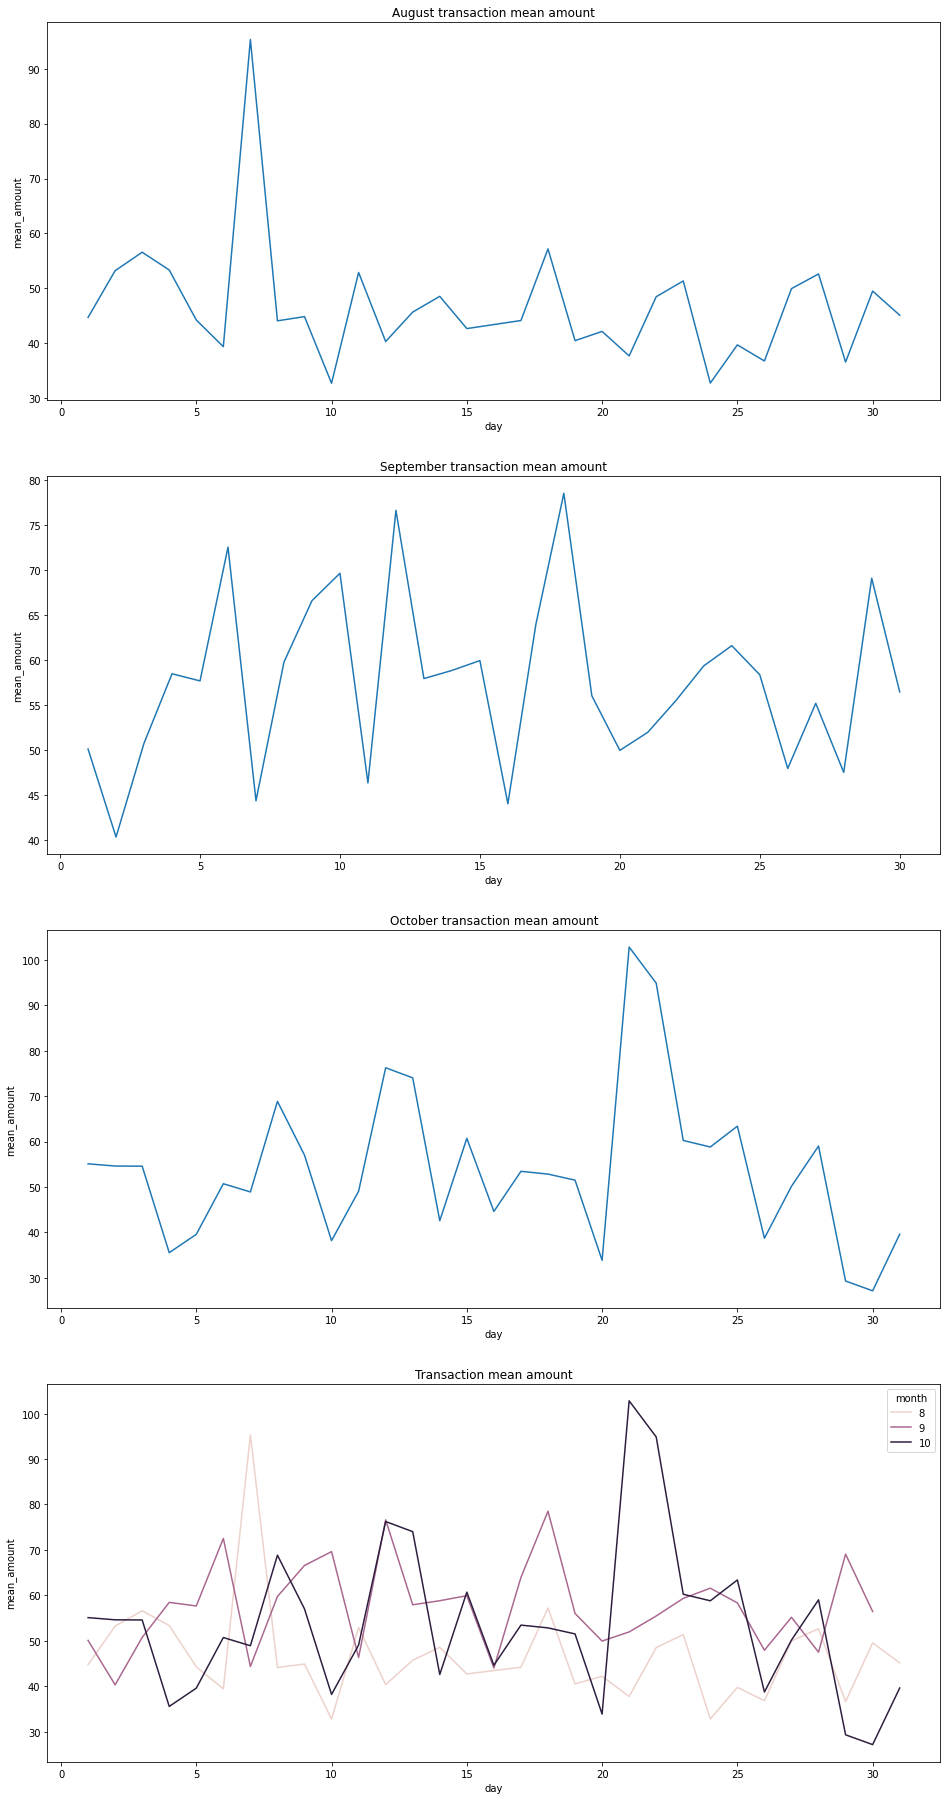

In [40]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4)
fig.set_size_inches(16,32)
sns.lineplot(data=df, x=df.loc[df['month']==8]['day'], y='mean_amount', ax=ax1)
ax1.set_title("August transaction mean amount")
sns.lineplot(data=df, x=df.loc[df['month']==9]['day'], y='mean_amount', ax=ax2)
ax2.set_title("September transaction mean amount")
sns.lineplot(data=df, x=df.loc[df['month']==10]['day'], y='mean_amount', ax=ax3)
ax3.set_title("October transaction mean amount")
sns.lineplot(data=df, x='day', y='mean_amount', ax=ax4, hue='month')
ax4.set_title("Transaction mean amount")

##### mean_amount comparison by month, day
* seasonality disappered comparison to w/ pay/salary

### analysis by age_group, transaction

In [41]:
interested = ['hour', 'age_group','txn_description']
function = ['count', 'mean','sum']
df = data.groupby(interested).agg(function)['amount'].reset_index()
df.columns = ['hour', 'age_group','transaction', 'count', 'mean_amount', 'total_amount']
df.head()

,hour,age_group,transaction,count,mean_amount,total_amount
0,0,10s,POS,4,24.980000,99.92
1,0,10s,SALES-POS,5,27.450000,137.25
2,0,20s,POS,27,28.570000,771.39
3,0,20s,SALES-POS,28,28.479643,797.43
4,0,30s,POS,14,26.458571,370.42


<AxesSubplot:xlabel='age_group', ylabel='mean_amount'>

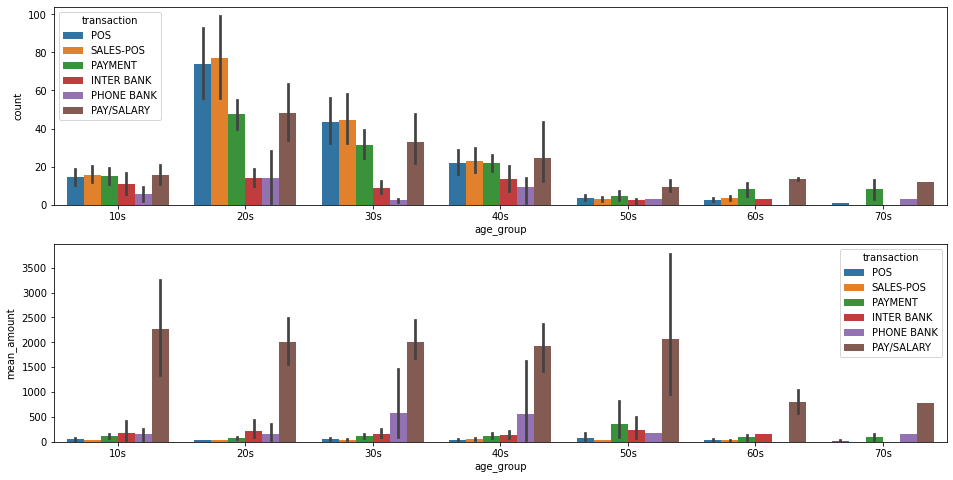

In [42]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
fig.set_size_inches(16,8)
sns.barplot(data=df, x='age_group', y='count',ax = ax1, hue='transaction')
sns.barplot(data=df, x='age_group', y='mean_amount',ax = ax2, hue='transaction')

##### transaction type by age_group
##### count
* 10~30s : sales-pos and pos are higest
* 40s~ : salary is highest 

##### mean_amount
* Pay/salary is highest in all age_group
* Phone bank is high especially in 30~40s

### w/o Pay/salary analysis by age_group, transaction

In [43]:
data.groupby('age_group').sum()['count']

age_group
10s    1135
20s    5337
30s    3200
40s    1953
50s     194
60s     190
70s      34
Name: count, dtype: int64

* less data in 40~70s age_group

In [44]:
interested = ['hour', 'age_group','txn_description']
function = ['count', 'mean','sum']
df = data.loc[data['txn_description']!="PAY/SALARY"].groupby(interested)['amount'].agg(function).reset_index()
df.columns = ['hour', 'age_group', 'transaction', 'count', 'mean_amount', 'total_amount']
df

,hour,age_group,transaction,count,mean_amount,total_amount
0,0,10s,POS,4,24.980000,99.92
1,0,10s,SALES-POS,5,27.450000,137.25
2,0,20s,POS,27,28.570000,771.39
3,0,20s,SALES-POS,28,28.479643,797.43
4,0,30s,POS,14,26.458571,370.42
...,...,...,...,...,...,...
444,23,40s,SALES-POS,17,41.796471,710.54
445,23,50s,POS,1,21.420000,21.42
446,23,50s,SALES-POS,1,29.240000,29.24
447,23,60s,POS,2,18.255000,36.51


<AxesSubplot:xlabel='age_group', ylabel='mean_amount'>

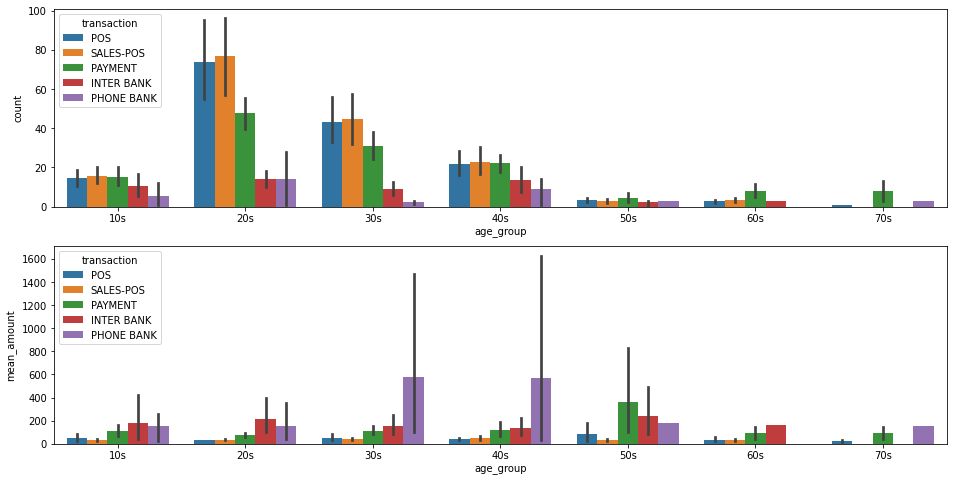

In [45]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
fig.set_size_inches(16,8)
sns.barplot(data=df, x='age_group', y='count',ax = ax1, hue='transaction')
sns.barplot(data=df, x='age_group', y='mean_amount',ax = ax2, hue='transaction')

##### transaction type by age_group (w/o pay/salary)
##### count
* 10~40s : sales-pos and pos are higest
* 50s~ : payment is highest 

##### mean_amount
* Phone bank is high especially in 30~40s
* Payment is highest especially in 50s
* 70s: Phone bank is highest 

### Distance between customer and merchant

In [95]:
data['c_long'] = data['long_lat'].apply(lambda x : x[0:x.find("-",0,len(x))])
data['c_lat'] = data['long_lat'].apply(lambda x : x[x.find("-",0,len(x)):])
data['m_long'] = data.loc[data['merchant_long_lat'].notnull()]['merchant_long_lat'].apply(lambda x : x[0:x.find("-",0,len(x))])
data['m_lat'] = data.loc[data['merchant_long_lat'].notnull()]['merchant_long_lat'].apply(lambda x : x[x.find("-",0,len(x)):])
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,count,month,hour,age_group,age_group2,day,c_long,c_lat,m_long,m_lat
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,1,8,1,20s,20s~40s,1,153.41,-27.95,153.38,-27.99
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,1,8,1,20s,20s~40s,1,153.41,-27.95,151.21,-33.87
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,1,8,1,30s,20s~40s,1,151.23,-33.94,151.21,-33.87
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,1,8,1,40s,20s~40s,1,153.10,-27.66,153.05,-26.68
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,1,8,1,20s,20s~40s,1,153.41,-27.95,153.44,-28.06


In [113]:
interested = ['c_long', 'c_lat']
df = data[interested]
df['c_long'] = df['c_long'].apply(lambda x: float(x))
df['c_lat'] = df['c_lat'].apply(lambda x: float(x))
df.head()

,c_long,c_lat
0,153.41,-27.95
1,153.41,-27.95
2,151.23,-33.94
3,153.10,-27.66
4,153.41,-27.95


In [137]:
df_temp=df.loc[df['c_long']<154].loc[113<df['c_long']].loc[-44<df['c_lat']].loc[df['c_lat']<-10]
df_temp['c_long'] = df_temp['c_long'].apply(lambda x: str(x))
df_temp['c_lat'] = df_temp['c_lat'].apply(lambda x: str(x))
df_temp['c_long_lat'] =df_temp['c_long'] +" " + df_temp['c_lat'] 
df_temp

,c_long,c_lat,c_long_lat
0,153.41,-27.95,153.41 -27.95
1,153.41,-27.95,153.41 -27.95
2,151.23,-33.94,151.23 -33.94
3,153.1,-27.66,153.1 -27.66
4,153.41,-27.95,153.41 -27.95
...,...,...,...
12038,149.83,-29.47,149.83 -29.47
12039,151.22,-33.87,151.22 -33.87
12040,151.12,-33.89,151.12 -33.89
12041,144.96,-37.76,144.96 -37.76


In [138]:
df['c_long'] = df['c_long'].apply(lambda x: str(x))
df['c_lat'] = df['c_lat'].apply(lambda x: str(x))
df['c_long_lat'] = df['c_long'] + " " + df['c_lat']
df

,c_long,c_lat,c_long_lat
0,153.41,-27.95,153.41 -27.95
1,153.41,-27.95,153.41 -27.95
2,151.23,-33.94,151.23 -33.94
3,153.1,-27.66,153.1 -27.66
4,153.41,-27.95,153.41 -27.95
...,...,...,...
12038,149.83,-29.47,149.83 -29.47
12039,151.22,-33.87,151.22 -33.87
12040,151.12,-33.89,151.12 -33.89
12041,144.96,-37.76,144.96 -37.76


* outlier in long_lat

In [142]:
diff = set(df['c_long_lat']) - set(df_temp['c_long_lat'])
diff

{'255.0 -573.0'}

In [247]:
data['c_long'] = data['c_long'].apply(lambda x: float(x))
data['c_lat'] = data['c_lat'].apply(lambda x: float(x))
data['m_long'] = data['m_long'].apply(lambda x: float(x))
data['m_lat'] = data['m_lat'].apply(lambda x: float(x))
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,count,month,hour,age_group,age_group2,day,c_long,c_lat,m_long,m_lat
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,1,8,1,20s,20s~40s,1,153.41,-27.95,153.38,-27.99
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,1,8,1,20s,20s~40s,1,153.41,-27.95,151.21,-33.87
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,1,8,1,30s,20s~40s,1,151.23,-33.94,151.21,-33.87
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,1,8,1,40s,20s~40s,1,153.10,-27.66,153.05,-26.68
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,1,8,1,20s,20s~40s,1,153.41,-27.95,153.44,-28.06


In [262]:
def distance(s_lat, s_lng, e_lat, e_lng):
    
    # approximate radius of earth in km
    R = 6373.0
    
    s_lat = s_lat*np.pi/180.0                      
    s_lng = np.deg2rad(s_lng)     
    e_lat = np.deg2rad(e_lat)                       
    e_lng = np.deg2rad(e_lng)  
    
    d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2
    
    return 2 * R * np.arcsin(np.sqrt(d)) 

In [263]:
df['distance'] = distance(df['c_lat'],df['c_long'],df['m_lat'],df['m_long'])
df

,c_long,c_lat,m_long,m_lat,distance
0,153.41,-27.95,153.38,-27.99,5.336746
1,153.41,-27.95,151.21,-33.87,691.081353
2,151.23,-33.94,151.21,-33.87,8.002007
3,153.10,-27.66,153.05,-26.68,109.117466
4,153.41,-27.95,153.44,-28.06,12.584991
...,...,...,...,...,...
12038,149.83,-29.47,145.23,-37.81,1020.403278
12039,151.22,-33.87,150.88,-33.96,32.941887
12040,151.12,-33.89,150.92,-33.74,24.899508
12041,144.96,-37.76,145.09,-37.91,20.218576


<AxesSubplot:ylabel='Density'>

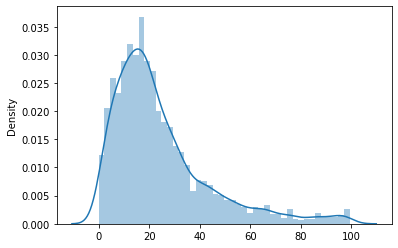

In [273]:
sns.distplot(x = data.loc[data['distance']<100]['distance'])